# GRIP - THE SPARKS FOUNDATION

### Data Science & Business Analytics Internship 

### Task 2 - Prediction Using Unsupervised Machine Learning
From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

#### Author : Roopa Calistus

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [3]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:

data = data.drop('Id', axis=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

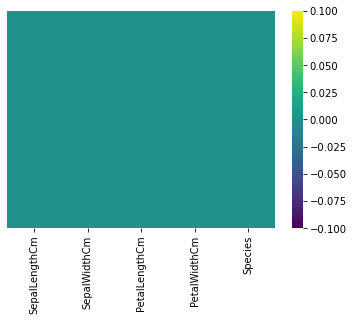

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [8]:
data.shape

(150, 5)

#### Checking for duplicate values

In [9]:
data.duplicated().sum()

3

In [10]:
data.drop_duplicates(inplace = True) #Drops the rows with similar entries
data.shape

(147, 5)

In [11]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Understanding the data

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


<AxesSubplot:xlabel='Species', ylabel='count'>

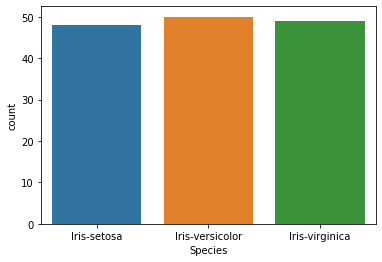

In [12]:

print(data.Species.value_counts())
sns.countplot(data.Species)

In [13]:
data.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


<AxesSubplot:>

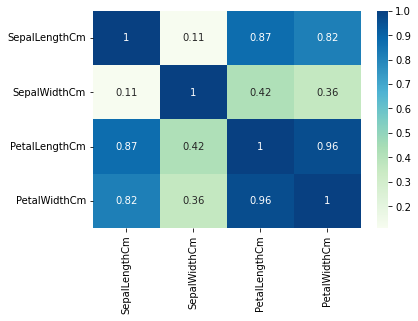

In [14]:
#plt.figure(figsize=(10,5))
sns.heatmap(abs(data.corr()),cmap='GnBu',annot=True)

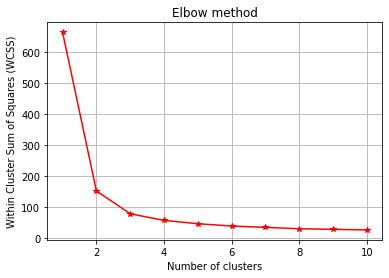

In [15]:
X = data.iloc[:, [0,1,2,3]].values
wcss =[]
for clusters in range(1, 11):
    kmeans = KMeans(n_clusters = clusters)
    kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss,marker = "*", color = 'red')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()### K-Means Clustering

### Train the K-means algorithm on the training dataset.

In [16]:

kmeans = KMeans(n_clusters = 3) 
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0 0 0
 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2]


In [17]:
kmeans.cluster_centers_


array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.01041667, 3.43125   , 1.4625    , 0.25      ],
       [5.90327869, 2.74918033, 4.38196721, 1.42622951]])

In [18]:

data['Cluster'] = y_kmeans
display(data['Cluster'].value_counts(), data['Species'].value_counts())


2    61
1    48
0    38
Name: Cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

### Visualising the clusters 

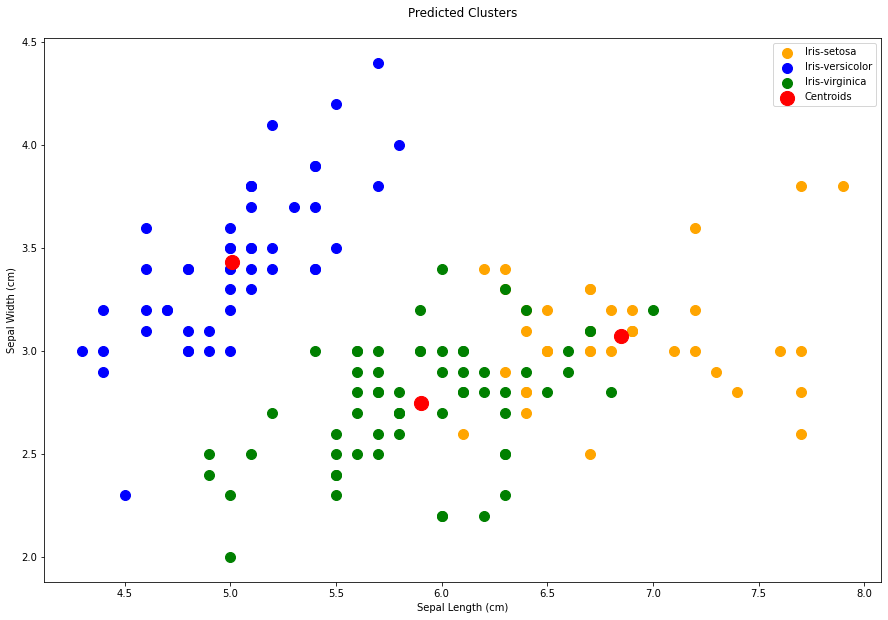

In [27]:

Labels = kmeans.predict(X)
plt.figure(figsize=(15,10))
plt.scatter(X[Labels == 0,0], X[Labels == 0,1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(X[Labels == 1,0], X[Labels == 1,1], s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(X[Labels == 2,0], X[Labels == 2,1], s = 100, c = 'green', label = 'Iris-virginica')

plt.title('Predicted Clusters\n')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'red', label = 'Centroids')
plt.xlabel('Sepal Length (cm)') 
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


#### We can see that there are slight changes in the prediction of the species

In [28]:
 
data.loc[data['Species']=='Iris-setosa']['Cluster'].value_counts() 

1    48
Name: Cluster, dtype: int64

In [29]:
data.loc[data['Species']=='Iris-versicolor']['Cluster'].value_counts()

2    48
0     2
Name: Cluster, dtype: int64

In [30]:
data.loc[data['Species']=='Iris-virginica']['Cluster'].value_counts()

0    36
2    13
Name: Cluster, dtype: int64

In [31]:
data['Species_encoded'] = data['Species'].apply(lambda x:1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0,2
148,6.2,3.4,5.4,2.3,Iris-virginica,0,2


### Performance and Evaluation of Model

In [32]:

print(classification_report(data['Species_encoded'],data['Cluster']))

              precision    recall  f1-score   support

           0       0.05      0.04      0.05        50
           1       1.00      1.00      1.00        48
           2       0.21      0.27      0.24        49

    accuracy                           0.43       147
   macro avg       0.42      0.44      0.43       147
weighted avg       0.42      0.43      0.42       147



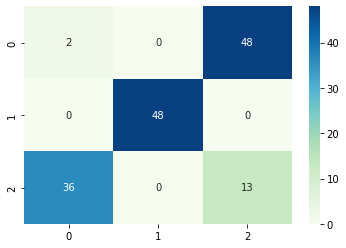

In [86]:

sns.heatmap(confusion_matrix(data['Species_encoded'], data['Cluster']), cmap = 'GnBu', annot = True); 